# The DataReader: Access financial data online

The pandas data_reader is a great package that provides easy access to a range of financial data sources on the web.

## Importing stock prices

In [30]:
import pandas as pd
import datetime as dt
from pandas_datareader.data import DataReader
from datetime import date # Date & Time functionality

In [38]:
# Provide the dates

start = date(2023,1,1) # Jan 1, 2023
end = date(2024,1,14) # today - Jan 14, 2024
ticker = '005930' # Samsung ticker
data_source = 'naver' # get info from Naver Finance (Korean Stock Market)
stock_data = DataReader(ticker, data_source, start, end)
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2023-01-02 to 2024-01-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    254 non-null    object
 1   High    254 non-null    object
 2   Low     254 non-null    object
 3   Close   254 non-null    object
 4   Volume  254 non-null    object
dtypes: object(5)
memory usage: 11.9+ KB


In [46]:
stock_data

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-02,55500.0,56100.0,55200.0,55500.0,10031448.0
2023-01-03,55400.0,56000.0,54500.0,55400.0,13547030.0
2023-01-04,55700.0,58000.0,55600.0,57800.0,20188071.0
2023-01-05,58200.0,58800.0,57600.0,58200.0,15682826.0
2023-01-06,58300.0,59400.0,57900.0,59000.0,17334989.0
...,...,...,...,...,...
2024-01-08,77000.0,77500.0,76400.0,76500.0,11088724.0
2024-01-09,77400.0,77700.0,74300.0,74700.0,26019249.0
2024-01-10,75000.0,75200.0,73200.0,73600.0,20259529.0


In [47]:
# Convert data from object to numeric to be able to plot

stock_data['Open']=stock_data['Open'].astype(float)
stock_data['High']=stock_data['High'].astype(float)
stock_data['Low']=stock_data['Low'].astype(float)
stock_data['Close']=stock_data['Close'].astype(float)
stock_data['Volume']=stock_data['Volume'].astype(float)

## Visualize Time Series

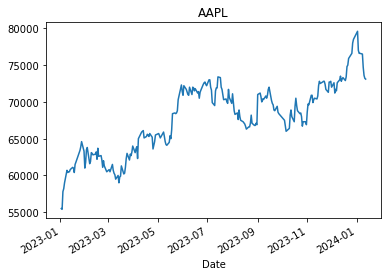

In [56]:
import matplotlib.pyplot as plt
stock_data['Close'].plot(title=ticker)
plt.show()

### Exercises

1. Get stock data for a single company

In [ ]:
# Import DataReader
from pandas_datareader.data import DataReader

# Import date
from datetime import date

# Set start and end dates
start = date(2016,1,1)
end = date(2016,12,31)

# Set the ticker
ticker = 'AAPL'

# Set the data source
data_source = 'iex'

# Import the stock prices
stock_prices = DataReader(ticker, data_source, start, end)

# Display and inspect the result
print(stock_prices.head())
stock_prices.info()

2. Visualize a stock price trend

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set start and end dates
start = date(2016,1,1)
end = date(2016,12,31)

# Set the ticker and data_source
ticker = 'FB'
data_source = 'iex'

# Import the data using DataReader
stock_prices = DataReader(ticker, data_source, start, end)

# Plot close
stock_prices['close'].plot(title=ticker)

# Show the plot
plt.show()

## Economic data from the Federal Reserve 

In [58]:
from pandas_datareader.data import DataReader
from datetime import date
series_code = 'DGS10' #10-year Treasury Rate
data_source = 'fred' # FED Economic Data Service
start = date (1962,1,1) # data since 1962 is available on the website
# skip the end date to obtain most recent data
data = DataReader(series_code, data_source, start)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16183 entries, 1962-01-02 to 2024-01-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DGS10   15493 non-null  float64
dtypes: float64(1)
memory usage: 252.9 KB


In [59]:
# Pandas Rename method
series_name = '10-year Treasury'
data = data.rename(columns={series_code: series_name})

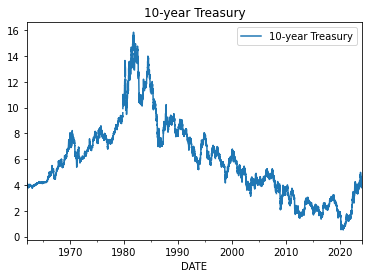

In [60]:
# Build a graph
data.plot(title=series_name); plt.show()

## Combine stock and economic data

In [67]:
start = date(2000,1,1)
series = 'DCOILWTICO' # West Texas Intermediate Oil Price
oil = DataReader(series, 'fred', start)
ticker = 'XOM' # Exxon Mobile Corporation
stock = DataReader(ticker, 'stooq', start) # Source is Stooq Finance

# Combine dataframes
data = pd.concat([stock[['Close']], oil], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6270 entries, 2000-01-03 to 2024-01-12
Freq: B
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       6045 non-null   float64
 1   DCOILWTICO  6026 non-null   float64
dtypes: float64(2)
memory usage: 147.0 KB


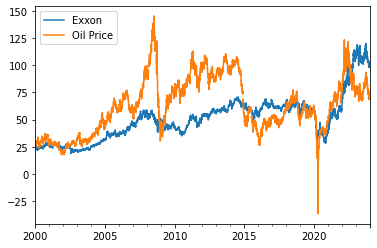

In [69]:
# Rename the columns by assigning two labels
data.columns = ['Exxon', 'Oil Price']
data.plot()
plt.show()

### Exercises

1. Visualize the long-term oil price trend

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 1968-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WTISPLC  672 non-null    float64
dtypes: float64(1)
memory usage: 10.5 KB


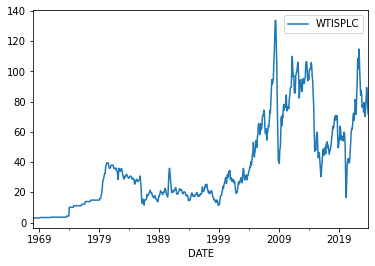

In [71]:
# Set start date
start = date(1968,1,1)

# Set series code
series = 'WTISPLC'

# Import the data
oil_price = DataReader(series, 'fred', start)

# Inspect the price of oil
oil_price.info()

# Plot the price of oil
oil_price.plot()

# Show the plot
plt.show()

2. Compare labor market participation and unemployment rates

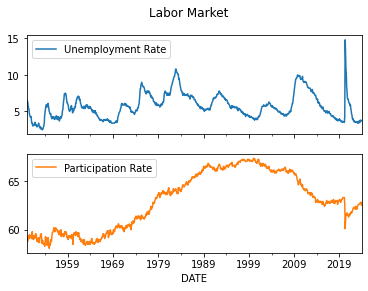

In [73]:
# Set the start date
start = date(1950,1,1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title='Labor Market')

# Show the plot
plt.show()

3. Compare bond and stock performance

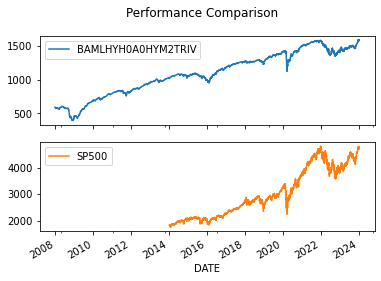

In [75]:
# Set the start date
start = date(2008,1,1)

# Set the series codes
series = ['BAMLHYH0A0HYM2TRIV', 'SP500'] #Bank of America Merrill Lynch US High Yield Total Return Index Value and S&P 500 Index

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(subplots=True, title='Performance Comparison')

# Show the plot
plt.show()

## Select stocks and get data from Stooq Finance

How to select stocks based on conditions. Criteria: Stock Exchange, Sector/Industry, IPO Year, Mkt Capitalization or a combination of these.

1. Select the stock ticker for the largest company by market capitalization listed on the NYSE

In [77]:
# Import the companies listed on this exchange

nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')

# Sort the data by market capitalization in descending order

nyse = nyse.sort_values('Market Capitalization', ascending = False)

# Display first 3 rows

nyse[['Stock Symbol', 'Company Name']].head(3)

,Stock Symbol,Company Name
1586,JNJ,Johnson & Johnson
1125,XOM,Exxon Mobil Corporation
1548,JPM,J P Morgan Chase & Co


In [81]:
# Use dot-iloc to select the first row of the sorted DataFrame

largest_by_market_cap = nyse.iloc[0]
largest_by_market_cap['Stock Symbol']

'JNJ'

In [83]:
# Another Way to do this

# Use set_index to move the stock symbol into the index of the DataFrame

nyse = nyse.set_index('Stock Symbol')
nyse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3147 entries, JNJ to EAE
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           3147 non-null   object 
 1   Last Sale              3079 non-null   float64
 2   Market Capitalization  3147 non-null   float64
 3   IPO Year               1361 non-null   float64
 4   Sector                 2177 non-null   object 
 5   Industry               2177 non-null   object 
dtypes: float64(3), object(3)
memory usage: 172.1+ KB


In [84]:
# Use the method idxmax

nyse['Market Capitalization'].idxmax()

'JNJ'

2. Get ticker for the largest tech company

In [85]:
# Use dot-unique method to return the unique values in a given column

nyse['Sector'].unique()

array(['Health Care', 'Energy', 'Finance', 'Miscellaneous',
       'Public Utilities', 'Basic Industries', 'Consumer Services',
       'Consumer Non-Durables', 'Technology', 'Capital Goods',
       'Transportation', 'Consumer Durables', nan], dtype=object)

In [86]:
# Pass the condition to the loc selector

tech = nyse.loc[nyse.Sector == 'Technology']
tech['Company Name'].head(2)

Stock Symbol
ORCL                                 Oracle Corporation
TSM     Taiwan Semiconductor Manufacturing Company Ltd.
Name: Company Name, dtype: object

In [87]:
nyse.loc[nyse.Sector == 'Technology', 'Market Capitalization'].idxmax()

'ORCL'

3. Get data for the largest tech company with 2017 IPO

In [89]:
ticker = nyse.loc[(nyse.Sector == 'Technology') & (nyse['IPO Year']==2017), 'Market Capitalization'].idxmax()

In [90]:
ticker

'SNAP'

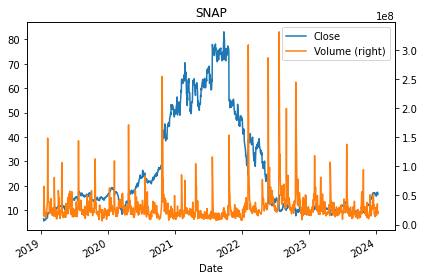

In [92]:
# Get financial data from Stooq

data = DataReader(ticker, 'stooq') # Omit the start date to get all the data available
data = data.loc[:,['Close','Volume']]

# Plot data

data.plot(title=ticker, secondary_y='Volume')
plt.tight_layout(); plt.show() # Feature Tight Layout improves white space in plot

## Get several stocks & manage a MultiIndex

How to retrieve several stocks from the web and how to manage a DataFrame with more than a single Index.

1. Load prices for top 5 companies

In [96]:
nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')

# move company ticker to  the index

nasdaq.set_index('Stock Symbol', inplace=True)

# apply the method nlargest to get the largest 5 in the column Mkt Cap

top_5 = nasdaq['Market Capitalization'].nlargest(n=5) 
top_5.div(1000000) # Market Cap in million USD

Stock Symbol
AAPL     740024.467000
GOOGL    580917.530339
GOOG     569426.124504
MSFT     501903.061809
AMZN     422138.530626
Name: Market Capitalization, dtype: float64

In [109]:
# Convert index to list

tickers = top_5.index.tolist()
tickers

['AAPL', 'GOOGL', 'GOOG', 'MSFT', 'AMZN']

In [110]:
# Pass the list directly to DataReader to get all the info in a single call

df = DataReader(tickers, 'stooq', start=date(2020,1,1))

In [111]:
# The result is a df with two column levels - tickers and names
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1015 entries, 2024-01-12 to 2020-01-02
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, AAPL)    1015 non-null   float64
 1   (Close, GOOGL)   1015 non-null   float64
 2   (Close, GOOG)    1015 non-null   float64
 3   (Close, MSFT)    1015 non-null   float64
 4   (Close, AMZN)    1015 non-null   float64
 5   (High, AAPL)     1015 non-null   float64
 6   (High, GOOGL)    1015 non-null   float64
 7   (High, GOOG)     1015 non-null   float64
 8   (High, MSFT)     1015 non-null   float64
 9   (High, AMZN)     1015 non-null   float64
 10  (Low, AAPL)      1015 non-null   float64
 11  (Low, GOOGL)     1015 non-null   float64
 12  (Low, GOOG)      1015 non-null   float64
 13  (Low, MSFT)      1015 non-null   float64
 14  (Low, AMZN)      1015 non-null   float64
 15  (Open, AAPL)     1015 non-null   float64
 16  (Open, GOOGL)    1015 non-null   float64
 

In [112]:
df

Attributes     Close                                             High  \
Symbols         AAPL     GOOGL      GOOG     MSFT      AMZN      AAPL   
Date                                                                    
2024-01-12  185.9200  142.6500  144.2400  388.470  154.6200  186.7400   
2024-01-11  185.5900  142.0800  143.6700  384.630  155.1800  187.0500   
2024-01-10  186.1900  142.2800  143.8000  382.770  153.7300  186.4000   
2024-01-09  185.1400  140.9500  142.5600  375.790  151.3700  185.1500   
2024-01-08  185.5600  138.8400  140.5300  374.690  149.1000  185.6000   
...              ...       ...       ...      ...       ...       ...   
2020-01-08   74.2575   70.2520   70.2160  155.656   94.5985   74.5626   
2020-01-07   73.0831   69.7555   69.6670  153.183   95.3430   73.6972   
2020-01-06   73.4250   69.8905   69.7105  154.613   95.1440   73.4649   
2020-01-03   72.8488   68.0760   68.0330  154.216   93.7485   73.6185   
2020-01-02   73.5616   68.4340   68.3685  156.133   94.9005   73.6225   

Attributes                                         ...      Open            \
Symbols        GOOGL      GOOG     MSFT      AMZN  ...      AAPL     GOOGL   
Date                                               ...                       
2024-01-12  143.1950  144.7400  388.680  156.2000  ...  186.0600  142.6700   
2024-01-11  145.2200  146.6600  390.680  157.1700  ...  186.5400  143.4900   
2024-01-10  143.0000  144.5250  384.170  154.4200  ...  184.3500  141.0000   
2024-01-09  141.4850  142.7998  375.990  151.7100  ...  183.9200  138.5000   
2024-01-08  139.0100  140.6400  375.200  149.4000  ...  182.0850  136.2900   
...              ...       ...      ...       ...  ...       ...       ...   
2020-01-08   70.5925   70.5790  156.301   95.5500  ...   72.7810   69.7410   
2020-01-07   70.1750   70.1495  155.249   95.6945  ...   73.4350   70.0230   
2020-01-06   69.9160   69.8250  154.683   95.1845  ...   71.9515   67.5815   
2020-01-03   68.6875   68.6250  155.517   94.3100  ...   72.7790   67.4000   
2020-01-02   68.4340   68.4070  156.231   94.9005  ...   72.5537   67.4205   

Attributes                                    Volume                          \
Symbols         GOOG     MSFT     AMZN          AAPL       GOOGL        GOOG   
Date                                                                           
2024-01-12  144.3400  385.490  155.390  4.047778e+07  18785514.0  13998729.0   
2024-01-11  144.8950  386.000  155.040  4.912841e+07  24008722.0  17471130.0   
2024-01-10  142.5200  376.370  152.060  4.679291e+07  21320203.0  16641881.0   
2024-01-09  140.0600  372.010  148.330  4.284181e+07  24759598.0  19579667.0   
2024-01-08  138.0000  369.300  146.740  5.914447e+07  21403982.0  17645293.0   
...              ...      ...      ...           ...         ...         ...   
2020-01-08   69.6040  154.514   94.902  1.351095e+08  35325480.0  30583540.0   
2020-01-07   69.8970  154.900   95.225  1.138238e+08  34529120.0  30233860.0   
2020-01-06   67.5000  152.688   93.000  1.210384e+08  46786860.0  34662980.0   
2020-01-03   67.3930  153.918   93.225  1.495753e+08  23412580.0  23740120.0   
2020-01-02   67.0775  154.365   93.750  1.384613e+08  27285300.0  28134620.0   

Attributes                            
Symbols             MSFT        AMZN  
Date                                  
2024-01-12  2.166115e+07  40484155.0  
2024-01-11  2.785085e+07  49072691.0  
2024-01-10  2.551424e+07  44421830.0  
2024-01-09  2.082995e+07  43812567.0  
2024-01-08  2.313397e+07  46757053.0  
...                  ...         ...  
2020-01-08  2.855639e+07  70239320.0  
2020-01-07  2.250785e+07  82680200.0  
2020-01-06  2.142262e+07  81313960.0  
2020-01-03  2.172604e+07  75332080.0  
2020-01-02  2.328220e+07  80718200.0  

[1015 rows x 25 columns]

In [113]:
# Use method stack to move the ticker level to the index to have a single 
# level of column headers

df = df.stack()
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5075 entries, (Timestamp('2024-01-12 00:00:00'), 'AAPL') to (Timestamp('2020-01-02 00:00:00'), 'AMZN')
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5075 non-null   float64
 1   High    5075 non-null   float64
 2   Low     5075 non-null   float64
 3   Open    5075 non-null   float64
 4   Volume  5075 non-null   float64
dtypes: float64(5)
memory usage: 253.6+ KB


In [114]:
df

Attributes             Close      High       Low      Open        Volume
Date       Symbols                                                      
2024-01-12 AAPL     185.9200  186.7400  185.1900  186.0600  4.047778e+07
           GOOGL    142.6500  143.1950  141.8200  142.6700  1.878551e+07
           GOOG     144.2400  144.7400  143.3600  144.3400  1.399873e+07
           MSFT     388.4700  388.6800  384.6500  385.4900  2.166115e+07
           AMZN     154.6200  156.2000  154.0100  155.3900  4.048416e+07
...                      ...       ...       ...       ...           ...
2020-01-02 AAPL      73.5616   73.6225   72.2955   72.5537  1.384613e+08
           GOOGL     68.4340   68.4340   67.3245   67.4205  2.728530e+07
           GOOG      68.3685   68.4070   67.0775   67.0775  2.813462e+07
           MSFT     156.1330  156.2310  153.9280  154.3650  2.328220e+07
           AMZN      94.9005   94.9005   93.2075   93.7500  8.071820e+07

[5075 rows x 5 columns]

In [116]:
# Further reshape MultiIndex DF by selecting a single column and unstack

unstacked = df['Close'].unstack()
unstacked.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1015 entries, 2020-01-02 to 2024-01-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1015 non-null   float64
 1   GOOGL   1015 non-null   float64
 2   GOOG    1015 non-null   float64
 3   MSFT    1015 non-null   float64
 4   AMZN    1015 non-null   float64
dtypes: float64(5)
memory usage: 47.6 KB


In [117]:
unstacked

Symbols,AAPL,GOOGL,GOOG,MSFT,AMZN
Date,,,,,
2020-01-02,73.5616,68.4340,68.3685,156.133,94.9005
2020-01-03,72.8488,68.0760,68.0330,154.216,93.7485
2020-01-06,73.4250,69.8905,69.7105,154.613,95.1440
2020-01-07,73.0831,69.7555,69.6670,153.183,95.3430
2020-01-08,74.2575,70.2520,70.2160,155.656,94.5985
...,...,...,...,...,...
2024-01-08,185.5600,138.8400,140.5300,374.690,149.1000
2024-01-09,185.1400,140.9500,142.5600,375.790,151.3700
2024-01-10,186.1900,142.2800,143.8000,382.770,153.7300


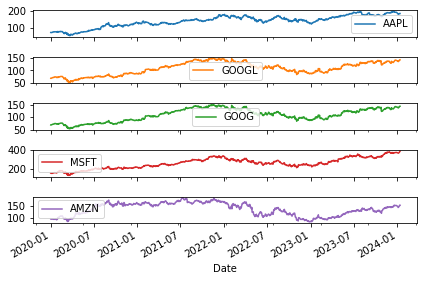

In [118]:
# To plot a DF with several columns, you can use subplots
# It displays each column on a separate chart

unstacked.plot(subplots=True)
plt.tight_layout()
plt.show()